In [11]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [12]:
df = pd.read_csv('df_cleaned.csv')

In [13]:
df

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,1,22,1,0,7.2500,0,1,0,1
1,1,0,38,1,0,71.2833,0,0,0,0
2,1,0,26,0,0,7.9250,0,1,0,1
3,1,0,35,1,0,53.1000,0,1,0,0
4,0,1,35,0,0,8.0500,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,1,27,0,0,13.0000,0,1,1,0
887,1,0,19,0,0,30.0000,0,1,0,0
888,0,0,26,1,2,23.4500,0,1,0,1
889,1,1,26,0,0,30.0000,0,0,0,0


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = df.drop(columns='Survived')
y = df['Survived']

scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X),columns=scaler.get_feature_names_out(X.columns))

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(true, predicted):
    acc = accuracy_score(true, predicted)
    f1 = f1_score(true, predicted)
    return acc, f1

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Naive Bayes (Gaussian)': GaussianNB(),
    'Naive Bayes (Bernoulli)': BernoulliNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(verbose=0),
    'CatBoost': CatBoostClassifier(verbose=0)
}



result = []

for name,model in models.items():
    model.fit(X_train,y_train)
    
    #prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    #evaluation
    train_acc, train_f1 = evaluate_model(y_train, y_train_pred)
    test_acc, test_f1 = evaluate_model(y_test, y_test_pred)
    
    result.append({
        "Model": name,
        "Train_Accuracy": train_acc,
        "Train_F1": train_f1,
        "Test_Accuracy": test_acc,
        "Test_F1": test_f1
    })
    
result = pd.DataFrame(result)
result['f1_gap'] = result['Train_F1'] - result['Test_F1']

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [18]:
result

,Model,Train_Accuracy,Train_F1,Test_Accuracy,Test_F1,f1_gap
0,Logistic Regression,0.813202,0.734531,0.804469,0.751773,-0.017242
1,Linear Discriminant Analysis,0.797753,0.718750,0.782123,0.727273,-0.008523
2,Naive Bayes (Gaussian),0.804775,0.736243,0.770950,0.724832,0.011411
3,Naive Bayes (Bernoulli),0.785112,0.709677,0.765363,0.716216,-0.006539
4,K-Nearest Neighbors,0.867978,0.812749,0.832402,0.794521,0.018228
5,Decision Tree,0.977528,0.969466,0.798883,0.753425,0.216041
6,Random Forest,0.977528,0.970037,0.826816,0.786207,0.183831
7,Extra Trees,0.977528,0.969466,0.821229,0.783784,0.185682
8,Gradient Boosting,0.907303,0.866397,0.837989,0.794326,0.072071
9,Support Vector Machine,0.846910,0.763557,0.821229,0.761194,0.002363


hence, the best model is coming out to be KNN

In [19]:
knn = KNeighborsClassifier()
model = knn.fit(X_train,y_train)

y_pred = model.predict(X_test)

score = f1_score(y_test,y_pred)*100
print(f'Accuracy of the model is {round(score)}%')

Accuracy of the model is 79%


In [20]:
pred_df = pd.DataFrame({'Actual value':y_test,'Predicted value': y_pred})
pred_df

,Actual value,Predicted value
709,1,1
439,0,0
840,0,0
720,1,1
39,1,0
...,...,...
433,0,0
773,0,0
25,1,0
84,1,1


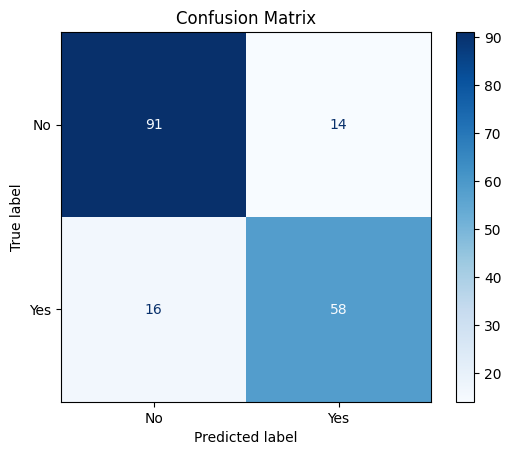

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()
